In [5]:
import sys
sys.path.append('../')
%load_ext autoreload
%autoreload 3

import xarray as xr
import matplotlib.pyplot as plt

from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.computational_tools import *
from helpers.plot_helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/OM4_SIS2')

In [3]:
ds.exps

['unparameterized-0.09',
 'unparameterized',
 'ZB20-Reynolds',
 'ZB20-Klower',
 'ANN-5x5-Klower',
 'ANN-3x3-32-32',
 'vert-diff',
 'JHAH15',
 'unparameterized-OM5',
 'ANN-3x3-EXP2',
 'ANN-redline',
 'ANN-greenline',
 'GM',
 'ANN-1x1',
 'DMM-R',
 'unparameterized-0.03']

Text(0.5, 0.98, 'Filters in ZB20')

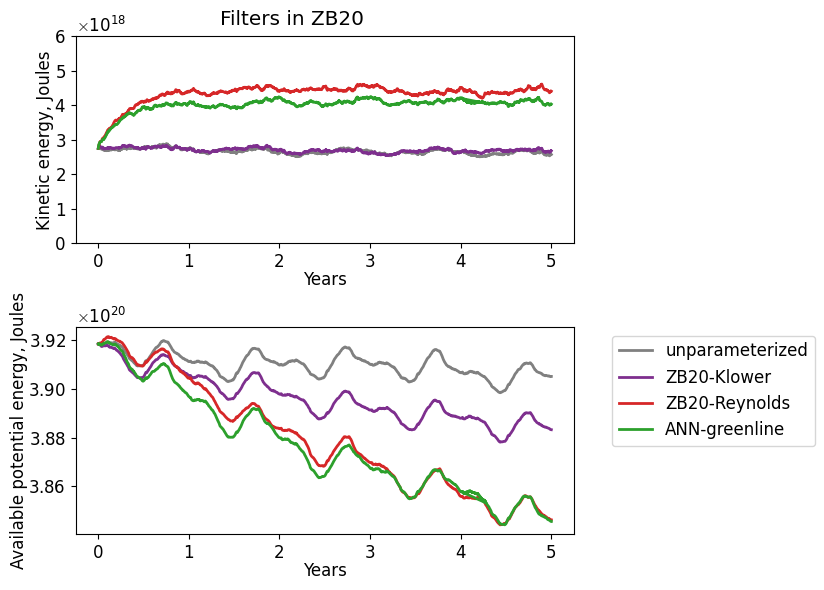

In [5]:
ds.plot_series(['unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline'])
plt.suptitle('Filters in ZB20')

CPU times: user 1.74 s, sys: 509 ms, total: 2.25 s
Wall time: 2.32 s


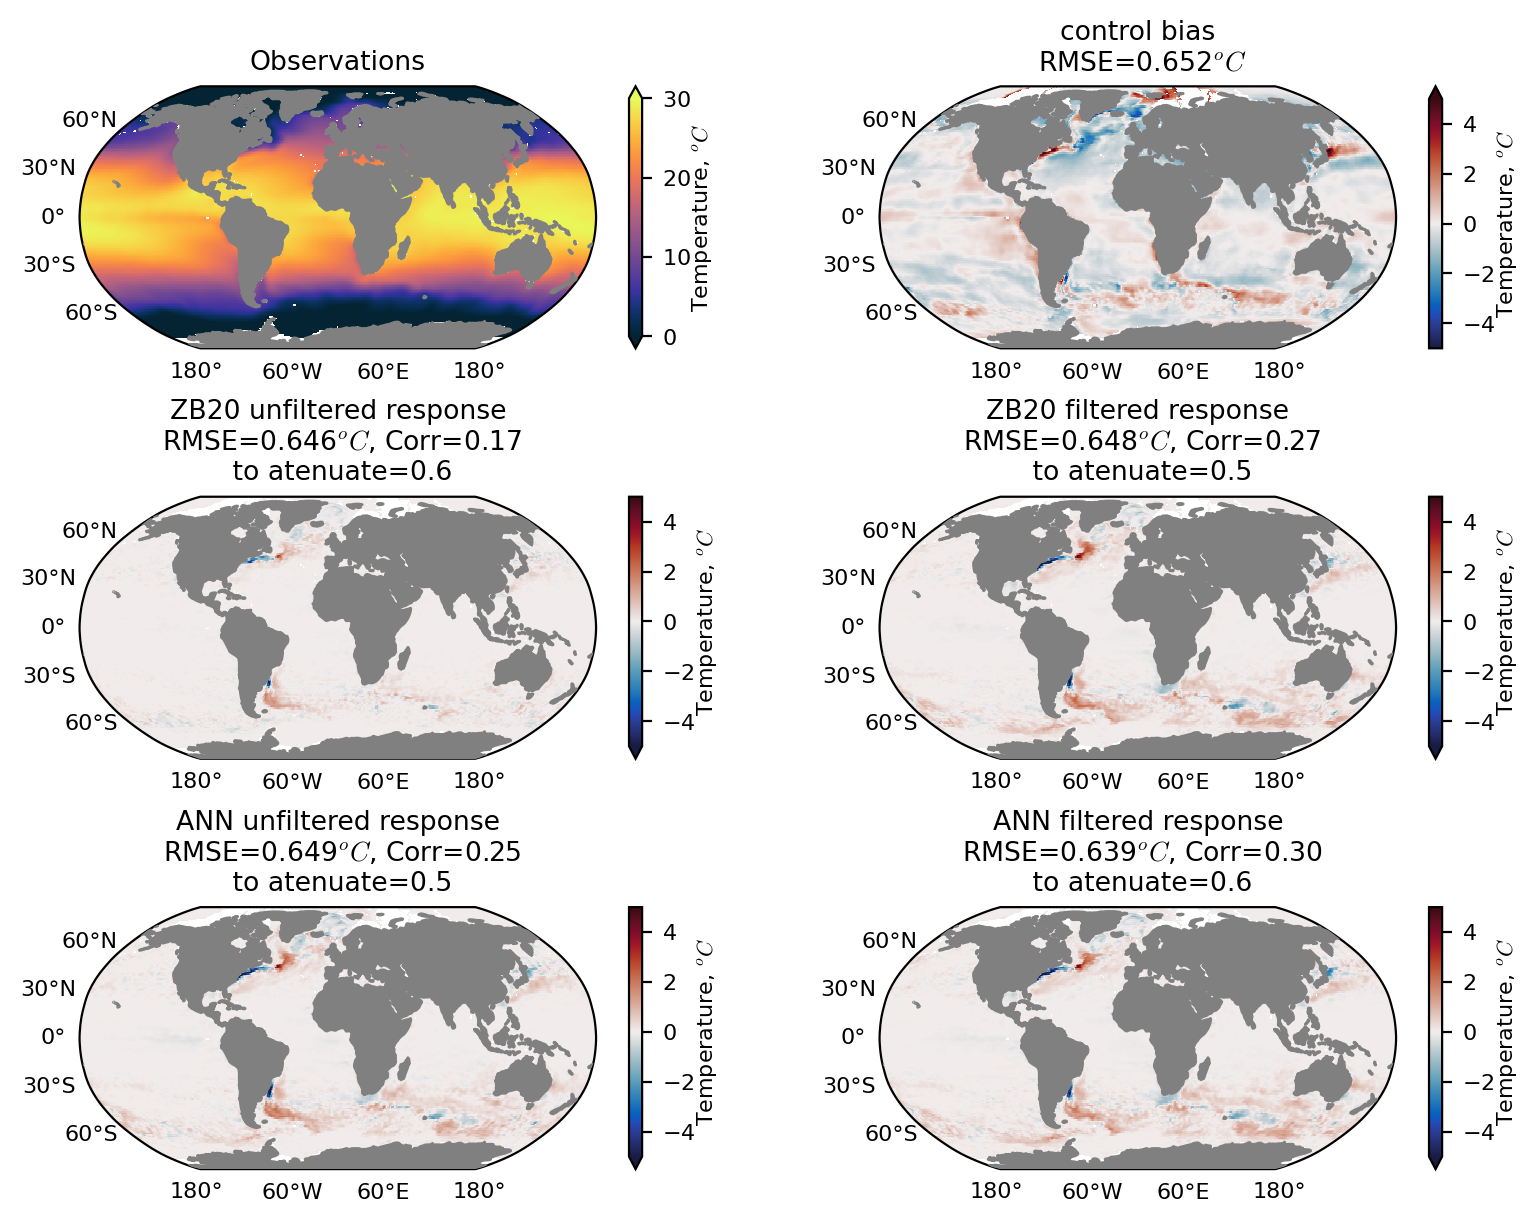

In [34]:
%time ds.plot_temp(['obs', 'unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline'], zl=0, projection='3D', \
                   labels=['Observations', 'control', 'ZB20 unfiltered', 'ZB20 filtered', 'ANN unfiltered', 'ANN filtered'], \
                   plot_type='response')

CPU times: user 277 ms, sys: 12 ms, total: 289 ms
Wall time: 290 ms


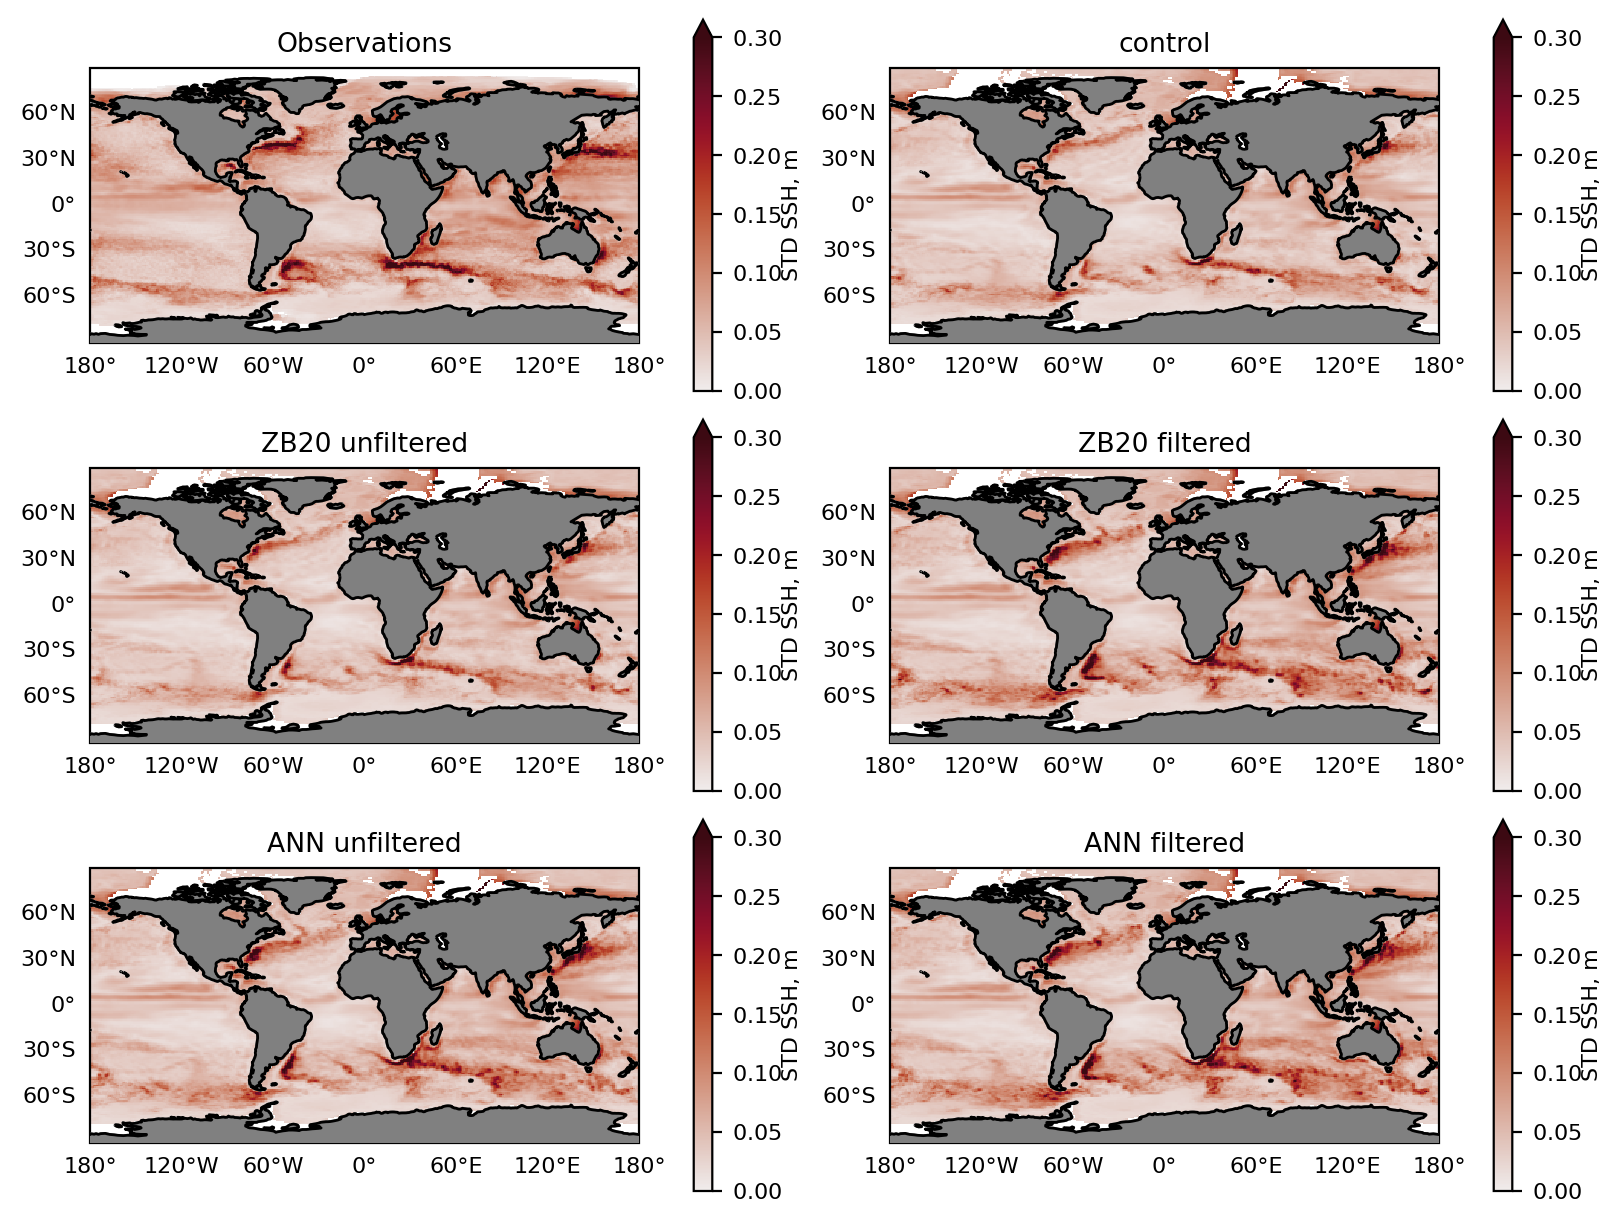

In [114]:
%time ds.plot_ssh_std(['obs', 'unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline'], projection='2D', \
                   labels=['Observations', 'control', 'ZB20 unfiltered', 'ZB20 filtered', 'ANN unfiltered', 'ANN filtered'], \
                   plot_type='default', select=select_globe)

CPU times: user 1.65 s, sys: 342 ms, total: 1.99 s
Wall time: 1.9 s


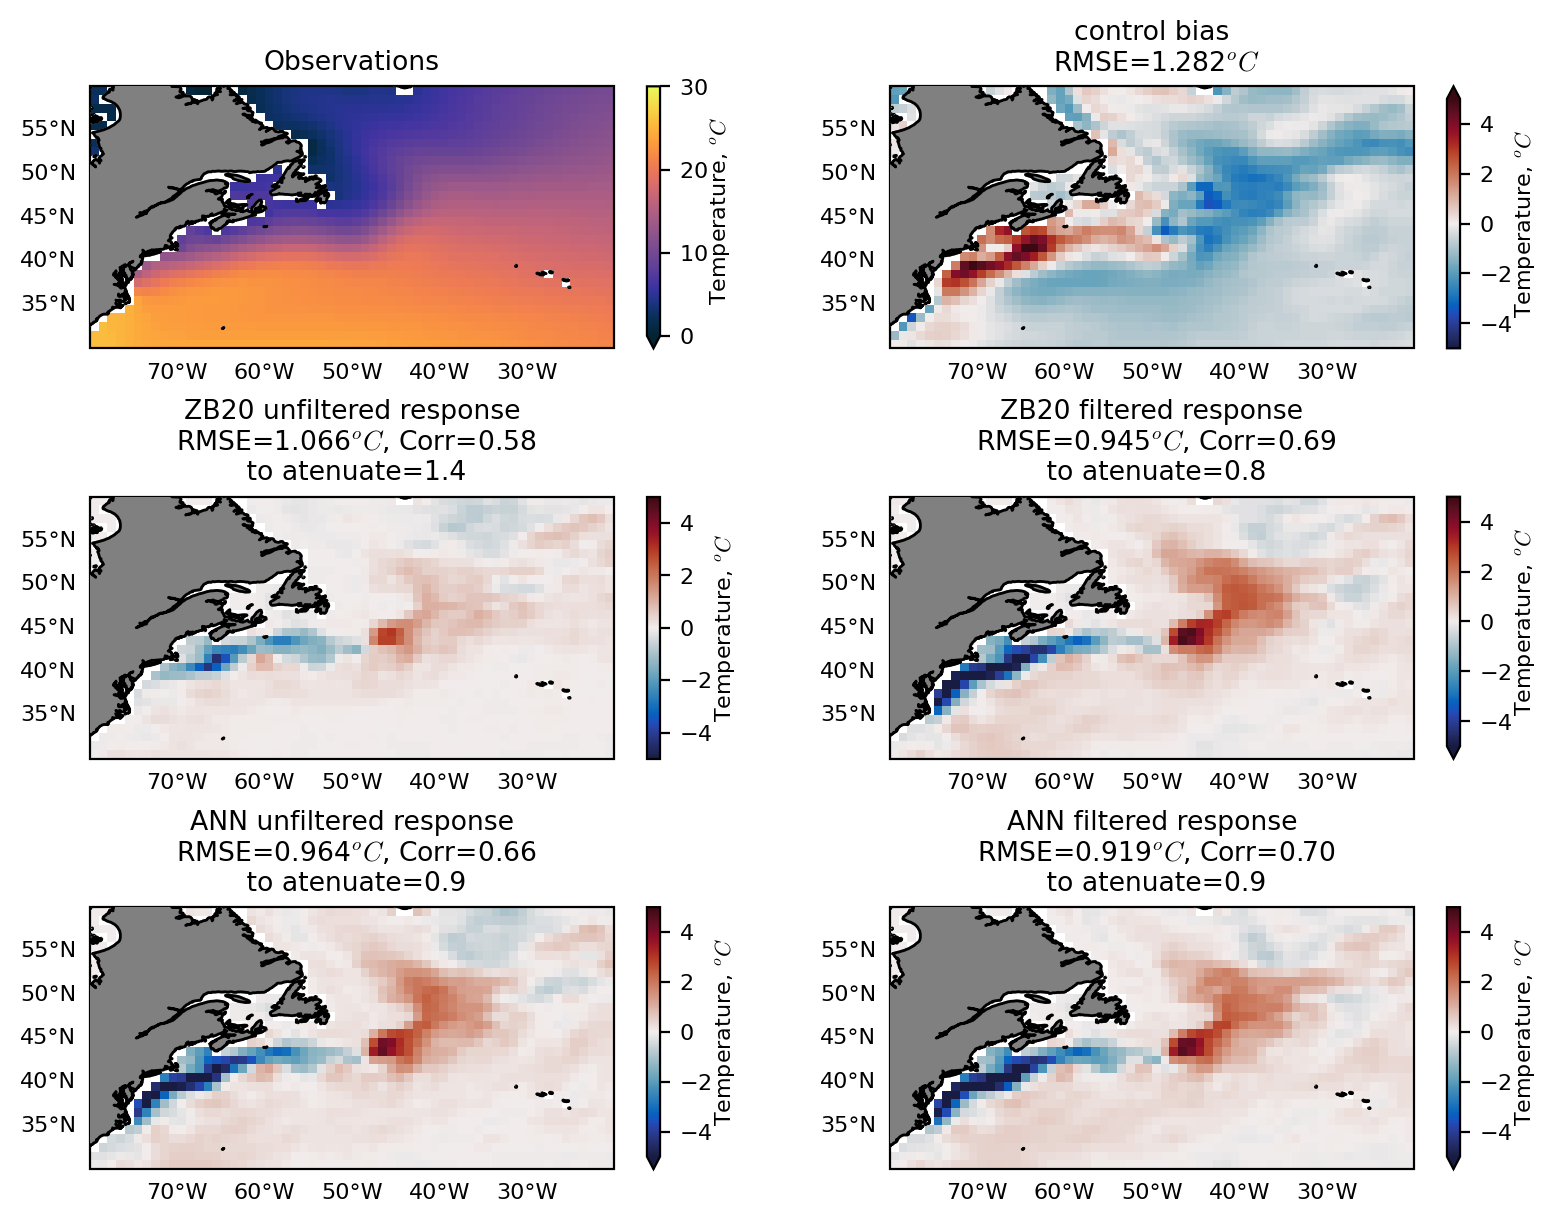

In [43]:
%time ds.plot_temp(['obs', 'unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline'], \
                   select=select_Gulf, \
                   labels=['Observations', 'control', 'ZB20 unfiltered', 'ZB20 filtered', 'ANN unfiltered', 'ANN filtered'], \
                   plot_type='response')

CPU times: user 2.78 s, sys: 719 ms, total: 3.5 s
Wall time: 2.93 s


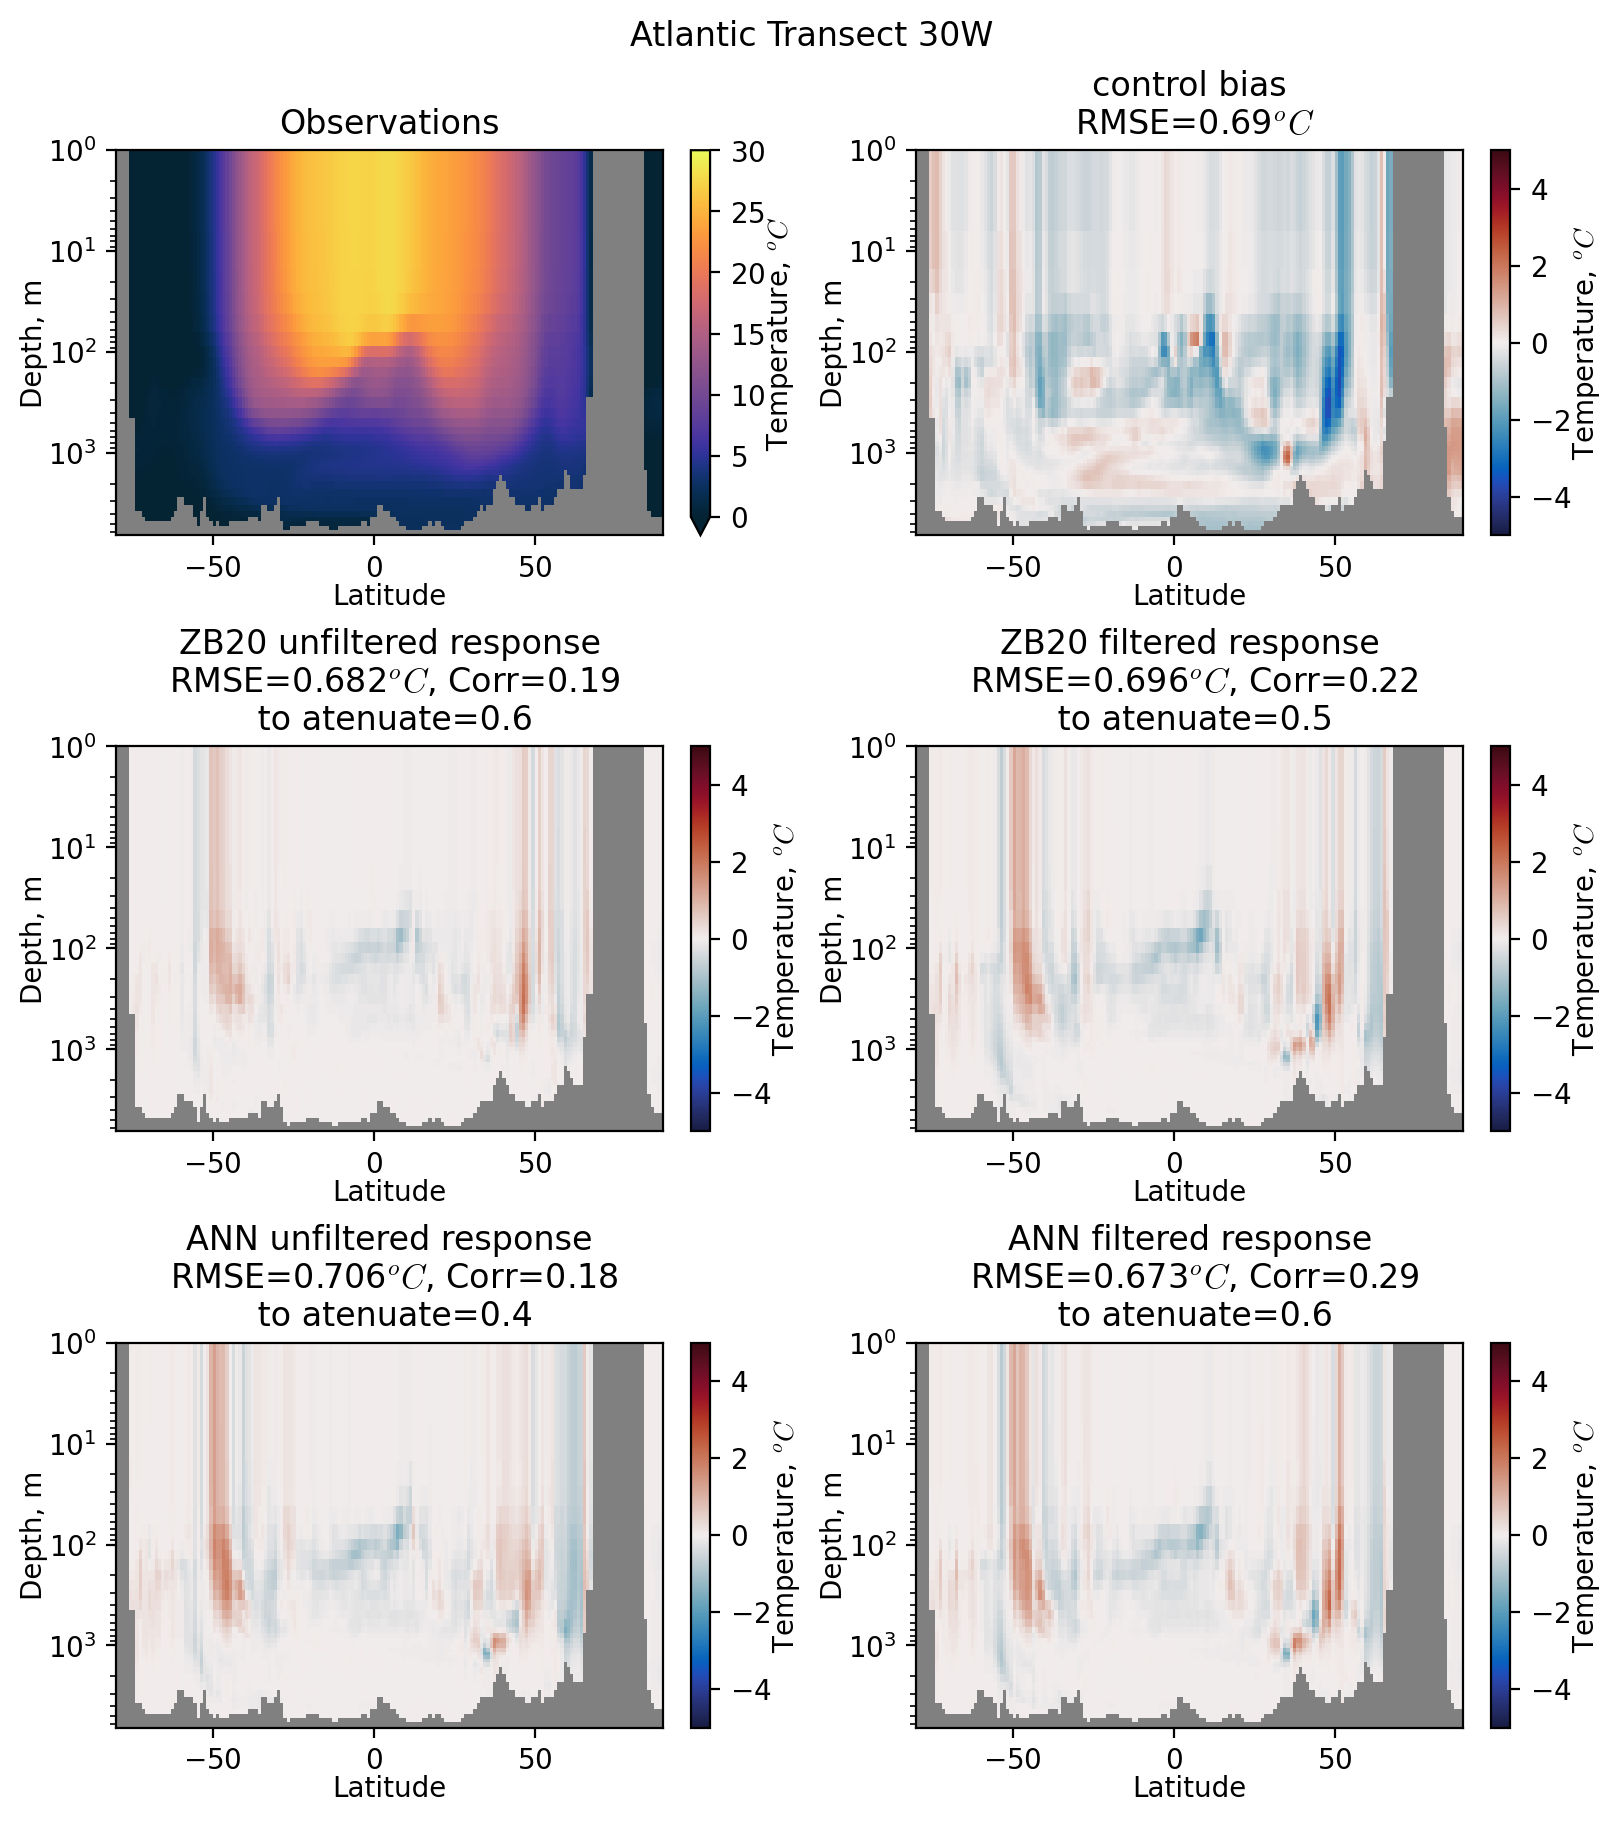

In [51]:
%time ds.plot_temp_section(['obs', 'unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline'], \
                   select=select_Atlantic_transect, \
                   labels=['Observations', 'control', 'ZB20 unfiltered', 'ZB20 filtered', 'ANN unfiltered', 'ANN filtered'], \
                   plot_type='response')
plt.suptitle('Atlantic Transect 30W')
plt.savefig('bias-response-Atlantic.pdf')

CPU times: user 233 ms, sys: 8.88 ms, total: 242 ms
Wall time: 247 ms


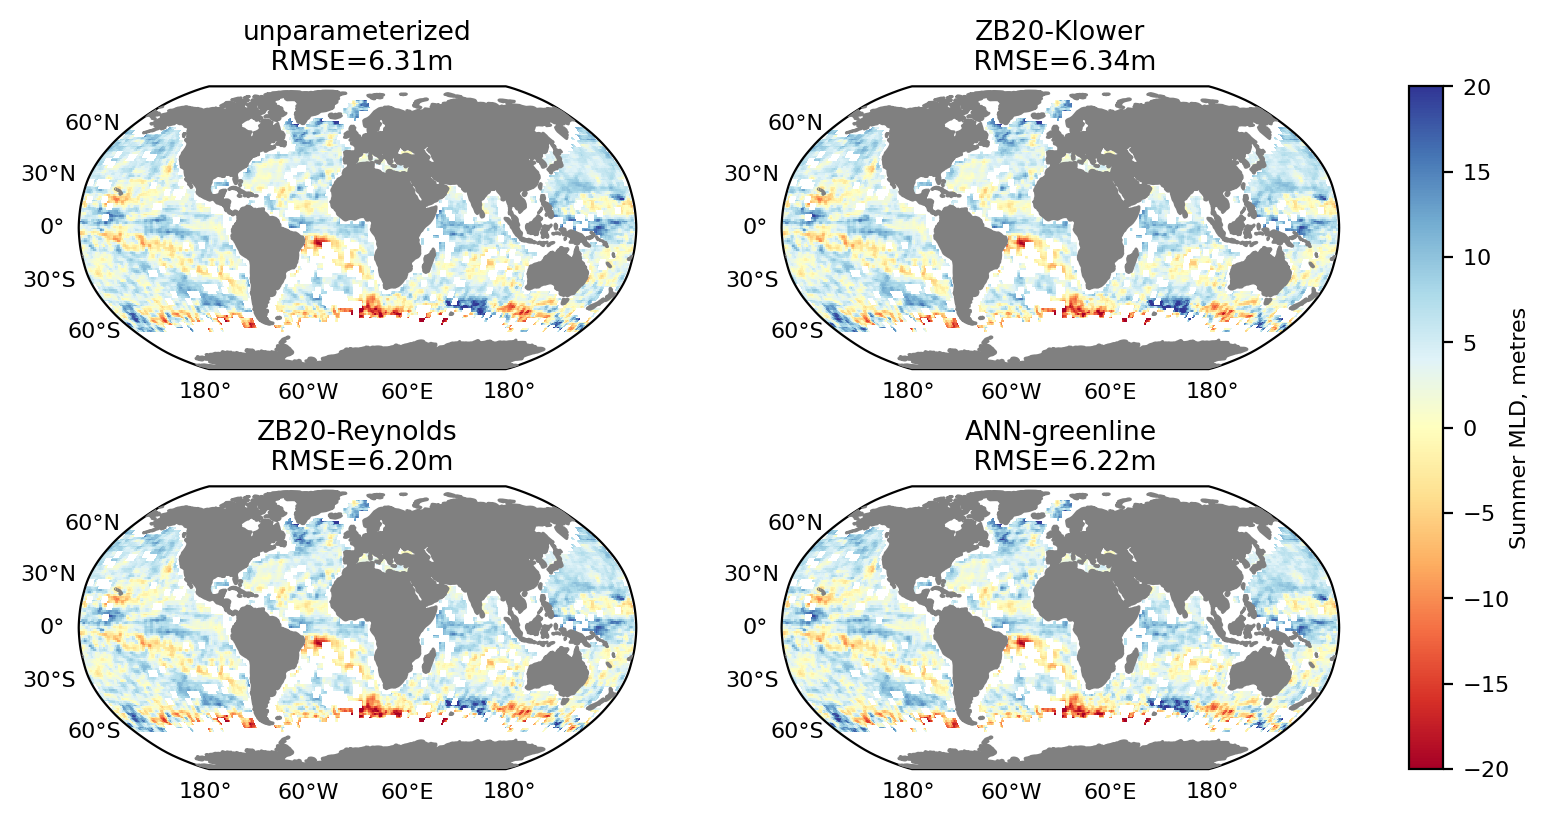

In [69]:
%time ds.plot_MLD_summer(['unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline'], select=select_globe, \
                   plot_type = 'bias', projection='3D')

CPU times: user 5.65 s, sys: 966 ms, total: 6.62 s
Wall time: 7.47 s


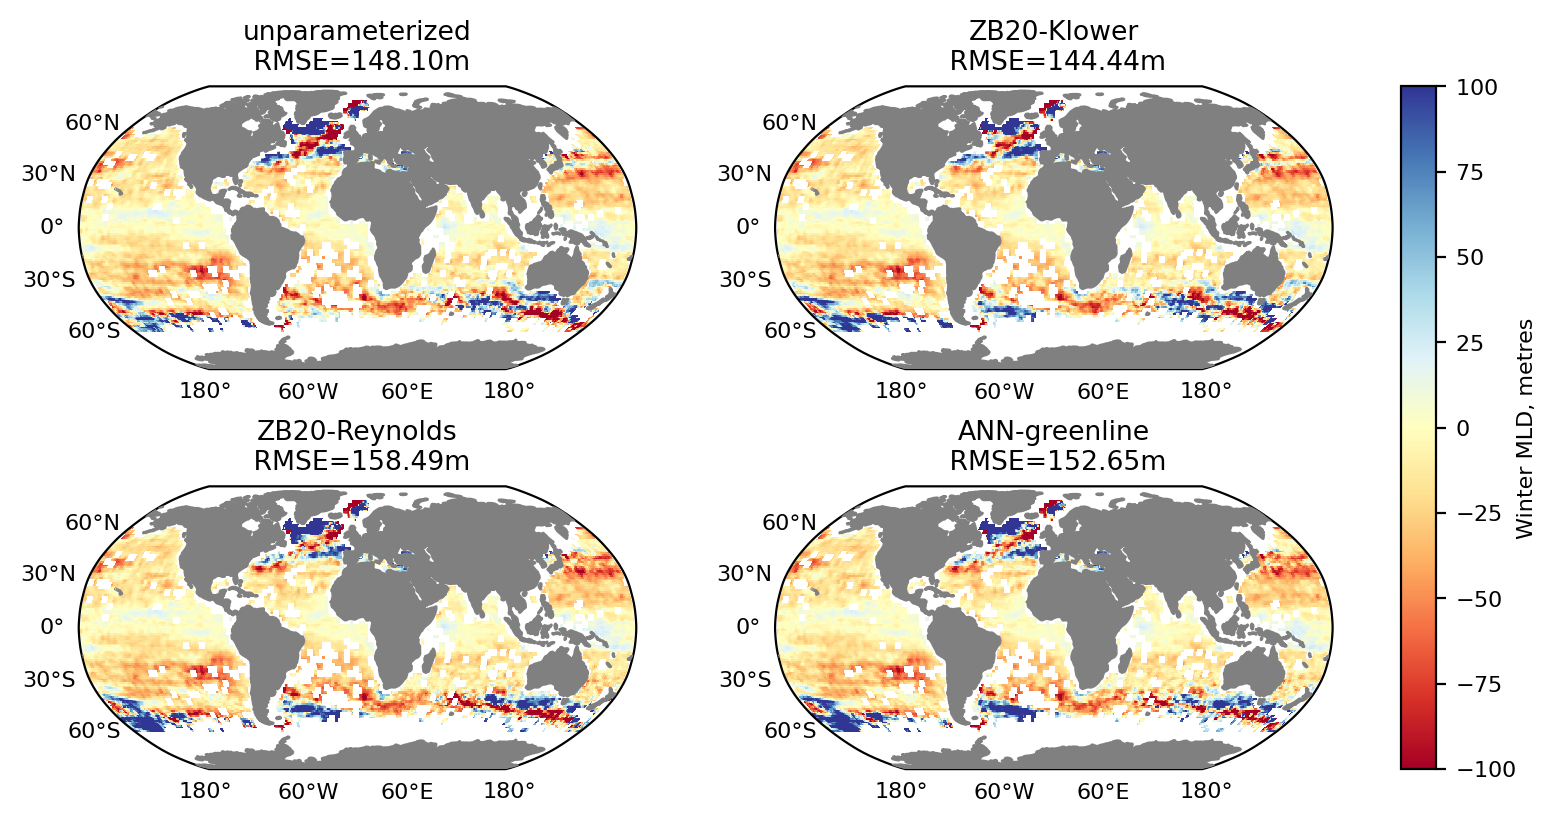

In [70]:
%time ds.plot_MLD_winter(['unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline'], select=select_globe, \
                   plot_type = 'bias', projection='3D')

Correlation: 0.8609298794968778
Relative Error: 0.5848269909665614
R2 =  0.7346356439675155
R2 max =  0.7437806347482859
Optinal scaling: 1.1241284772920777
Nans [test/control]: [62132, 58324]


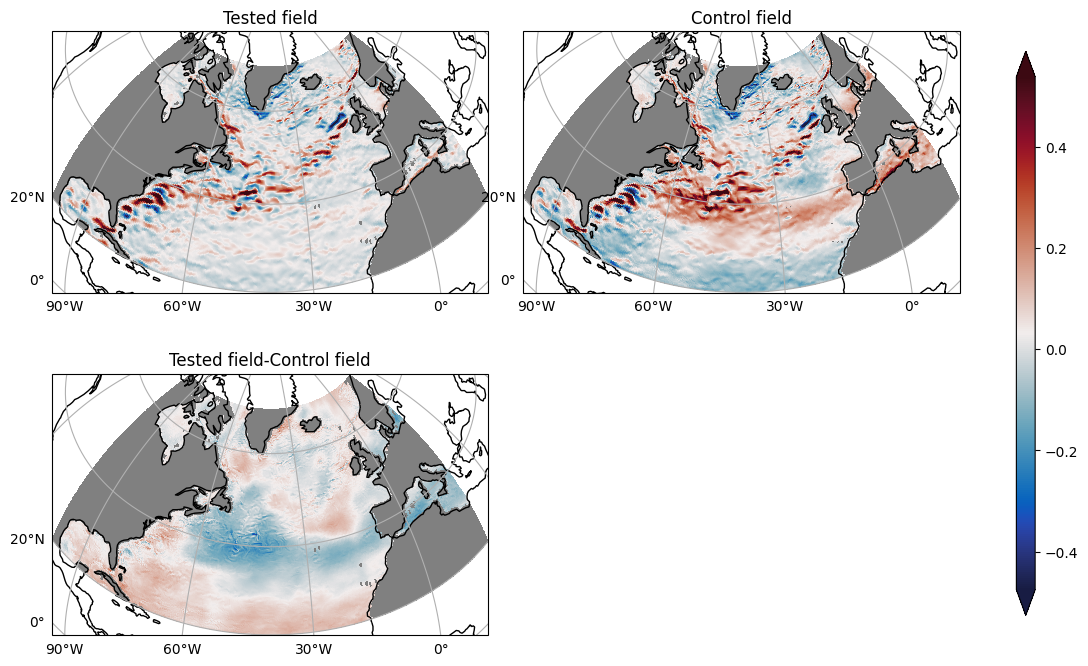

In [36]:
compare(ds['unparameterized'].geoU, ds['unparameterized'].ocean_daily.ssu, selector=select_NA_large)

Correlation: 0.7779230684789438
Relative Error: 0.7212293098723648
R2 =  0.5618397706600747
R2 max =  0.5690604138870234
Optinal scaling: 1.1263245695775244
Nans [test/control]: [43539, 40185]


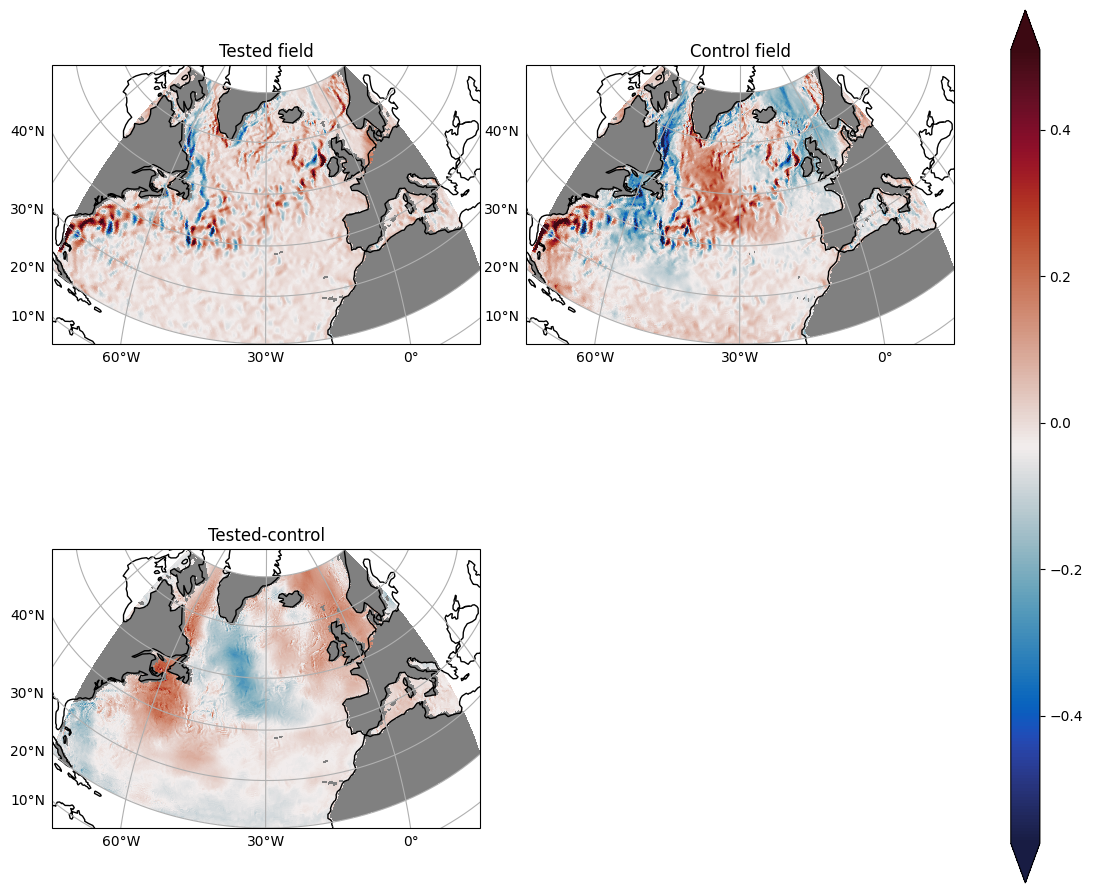

In [98]:
compare(ds['unparameterized'].geoV, ds['unparameterized'].ocean_daily.ssv, selector=select_NA_large)

Correlation: 0.36102482686596993
Relative Error: 1.1563392877578735
R2 =  -0.2913013696670532
R2 max =  0.13043427467346191
Optinal scaling: 0.35737982392311096
Nans [test/control]: [41367, 41367]


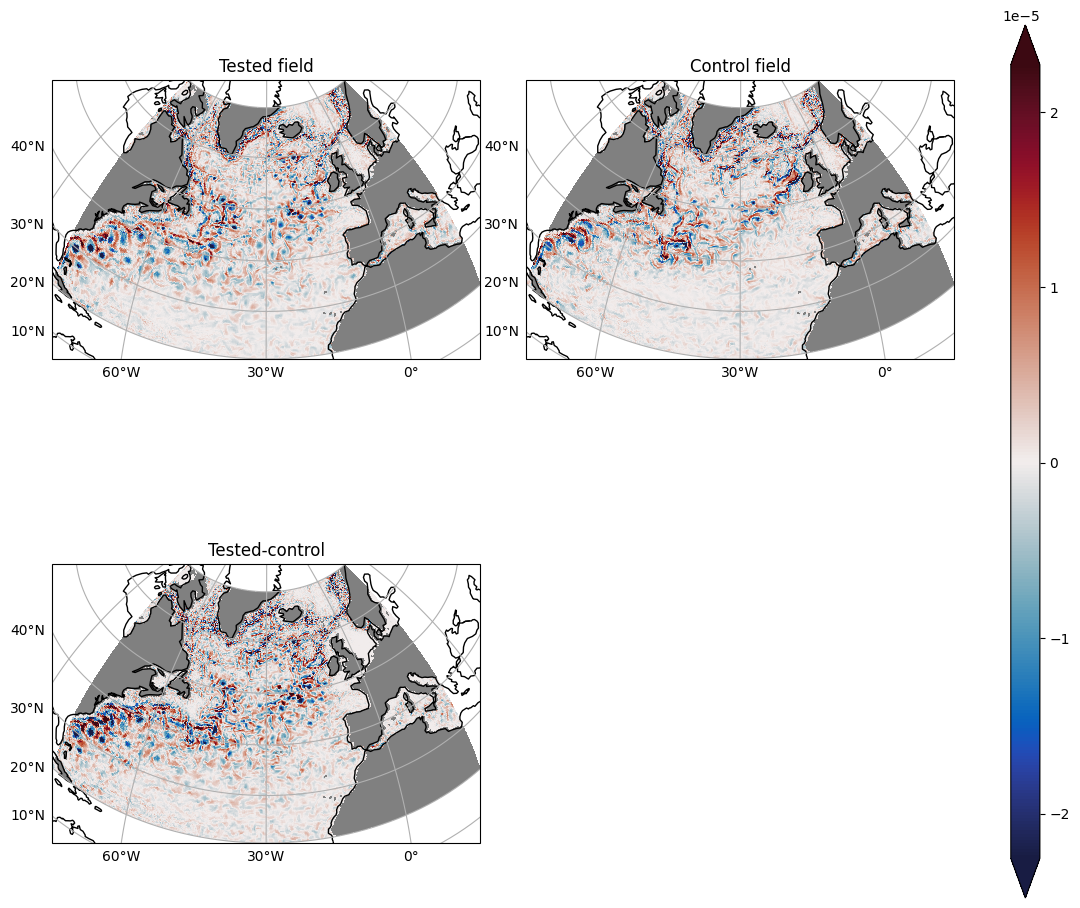

In [169]:
compare(ds['ANN-greenline'].RV, ds['unparameterized'].RV, selector=select_NA_large)

# Regions for Spectrum analysis

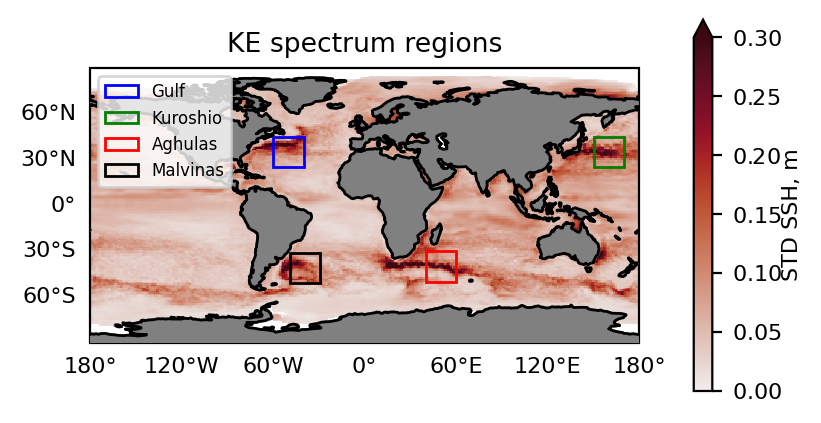

In [353]:
ds.plot_ssh_std(['obs'], ['KE spectrum regions'], select=select_globe)
import matplotlib.patches as patches

rect = patches.Rectangle((-60, 25), 20, 20, linewidth=1, edgecolor='b', facecolor='none', label='Gulf')
plt.gca().add_patch(rect)

rect = patches.Rectangle((150, 25), 20, 20, linewidth=1, edgecolor='g', facecolor='none', label='Kuroshio')
plt.gca().add_patch(rect)

rect = patches.Rectangle((40, -50), 20, 20, linewidth=1, edgecolor='r', facecolor='none', label='Aghulas')
plt.gca().add_patch(rect)

rect = patches.Rectangle((-49, -51), 20, 20, linewidth=1, edgecolor='k', facecolor='none', label='Malvinas')
plt.gca().add_patch(rect)

plt.legend(fontsize=6).set_zorder(1000)
plt.savefig('Spectrum_regions.pdf')

# Computing reference spectra

In [419]:
obs = xr.open_dataset('/vast/pp2681/altimetry_Copernicus.nc', chunks={'time':100}).rename(
            {'longitude': 'xh', 'latitude': 'yh'}).adt.sel(time=slice('1993','1995'))

In [420]:
R = 6.371e+6 # Earth radius in metres
res = 0.25 # Resolution in degrees
deg_to_rad = np.pi / 180 # degrees to radians factor
dxT = res * R * deg_to_rad * np.cos(obs.yh * deg_to_rad) * (obs.isel(time=-1)*0 + 1)
dyT = res * R * deg_to_rad * (obs.isel(time=-1)*0 + 1)

In [421]:
def geoKE_spectrum(zos, Lat=(25,45), Lon=(-60,-40)):
    '''
    We estimate KE spectrum from ssh, i.e.
    it is spectrum of geostrophic motions.
    
    Given the relation u = g/f nabla^perp ssh,
    The KE spectrum is given by:
    KE = g^2 / f^2 * k^2 * E,
    where E is the power spectrum of SSH
    '''
    E = compute_isotropic_PE(zos, dxT, dyT, 
                             Lat=Lat, Lon=Lon)
    Omega = 7.2921e-5
    g = 9.8
    deg_to_rad = np.pi / 180 # degrees to radians factor
    #  Coriolis parameter in the box averaged
    f = 2 * Omega * np.sin(self.param.yh * deg_to_rad).sel(yh=slice(25,45)).mean()
    
    KE = g**2 / f**2 * E.freq_r**2 * E
    return KE

In [422]:
%time geoKE_Gulf = geoKE_spectrum(obs,Lat=(25,45), Lon=(-60,-40)).mean('time').compute()
geoKE_Gulf.to_netcdf('../data/geoKE_Gulf.nc')

CPU times: user 2.94 s, sys: 6.52 s, total: 9.46 s
Wall time: 1.33 s


In [423]:
%time geoMKE_Gulf = geoKE_spectrum(obs.mean('time'),Lat=(25,45), Lon=(-60,-40)).compute()
geoMKE_Gulf.to_netcdf('../data/geoMKE_Gulf.nc')

CPU times: user 28.2 s, sys: 10.6 s, total: 38.8 s
Wall time: 23.8 s


In [424]:
%time geoKE_Kuroshio = geoKE_spectrum(obs,Lat=(25,45), Lon=(150,170)).mean('time').compute()
geoKE_Kuroshio.to_netcdf('../data/geoKE_Kuroshio.nc')

CPU times: user 2.81 s, sys: 5.46 s, total: 8.27 s
Wall time: 1.22 s


In [425]:
%time geoMKE_Kuroshio = geoKE_spectrum(obs.mean('time'),Lat=(25,45), Lon=(150,170)).compute()
geoMKE_Kuroshio.to_netcdf('../data/geoMKE_Kuroshio.nc')

CPU times: user 28.2 s, sys: 10.5 s, total: 38.7 s
Wall time: 23.6 s


In [426]:
%time geoKE_Aghulas = geoKE_spectrum(obs,Lat=(-50,-30), Lon=(40,60)).mean('time').compute()
geoKE_Aghulas.to_netcdf('../data/geoKE_Aghulas.nc')

CPU times: user 3.47 s, sys: 8.9 s, total: 12.4 s
Wall time: 1.64 s


In [427]:
%time geoMKE_Aghulas = geoKE_spectrum(obs.mean('time'),Lat=(-50,-30), Lon=(40,60)).compute()
geoMKE_Aghulas.to_netcdf('../data/geoMKE_Aghulas.nc')

CPU times: user 28.2 s, sys: 10.6 s, total: 38.8 s
Wall time: 23.6 s


In [428]:
%time geoKE_Malvinas = geoKE_spectrum(obs,Lat=(-51,-31), Lon=(-49,-29)).mean('time').compute()
geoKE_Malvinas.to_netcdf('../data/geoKE_Malvinas.nc')

CPU times: user 3.42 s, sys: 8.16 s, total: 11.6 s
Wall time: 1.55 s


In [429]:
%time geoMKE_Malvinas = geoKE_spectrum(obs.mean('time'),Lat=(-51,-31), Lon=(-49,-29)).compute()
geoMKE_Malvinas.to_netcdf('../data/geoMKE_Malvinas.nc')

CPU times: user 28.4 s, sys: 10.6 s, total: 38.9 s
Wall time: 23.6 s


In [437]:
geoEKE_Gulf = geoKE_Gulf - geoMKE_Gulf
geoEKE_Kuroshio = geoKE_Kuroshio - geoMKE_Kuroshio
geoEKE_Aghulas = geoKE_Aghulas - geoMKE_Aghulas
geoEKE_Malvinas = geoKE_Malvinas - geoMKE_Malvinas

geoEKE_Kuroshio.to_netcdf('../data/geoEKE_Kuroshio.nc')
geoEKE_Gulf.to_netcdf('../data/geoEKE_Gulf.nc')
geoEKE_Aghulas.to_netcdf('../data/geoEKE_Aghulas.nc')
geoEKE_Malvinas.to_netcdf('../data/geoEKE_Malvinas.nc')

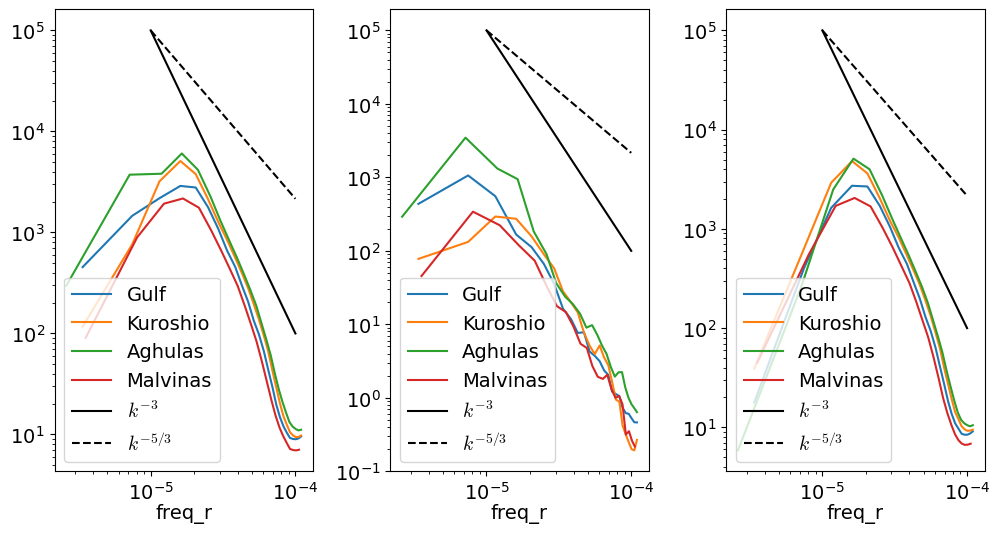

In [436]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)

geoKE_Gulf.plot(label='Gulf')
geoKE_Kuroshio.plot(label='Kuroshio')
geoKE_Aghulas.plot(label='Aghulas')
geoKE_Malvinas.plot(label='Malvinas')


k = np.array([1e-5,1e-4])
plt.plot(k,100000*(k*1e+5)**(-3), color='k', label='$k^{-3}$')
plt.plot(k,100000*(k*1e+5)**(-5./3.), color='k', ls='--', label='$k^{-5/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1,3,2)

geoMKE_Gulf.plot(label='Gulf')
geoMKE_Kuroshio.plot(label='Kuroshio')
geoMKE_Aghulas.plot(label='Aghulas')
geoMKE_Malvinas.plot(label='Malvinas')


k = np.array([1e-5,1e-4])
plt.plot(k,100000*(k*1e+5)**(-3), color='k', label='$k^{-3}$')
plt.plot(k,100000*(k*1e+5)**(-5./3.), color='k', ls='--', label='$k^{-5/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1,3,3)

geoEKE_Gulf.plot(label='Gulf')
geoEKE_Kuroshio.plot(label='Kuroshio')
geoEKE_Aghulas.plot(label='Aghulas')
geoEKE_Malvinas.plot(label='Malvinas')


k = np.array([1e-5,1e-4])
plt.plot(k,100000*(k*1e+5)**(-3), color='k', label='$k^{-3}$')
plt.plot(k,100000*(k*1e+5)**(-5./3.), color='k', ls='--', label='$k^{-5/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()

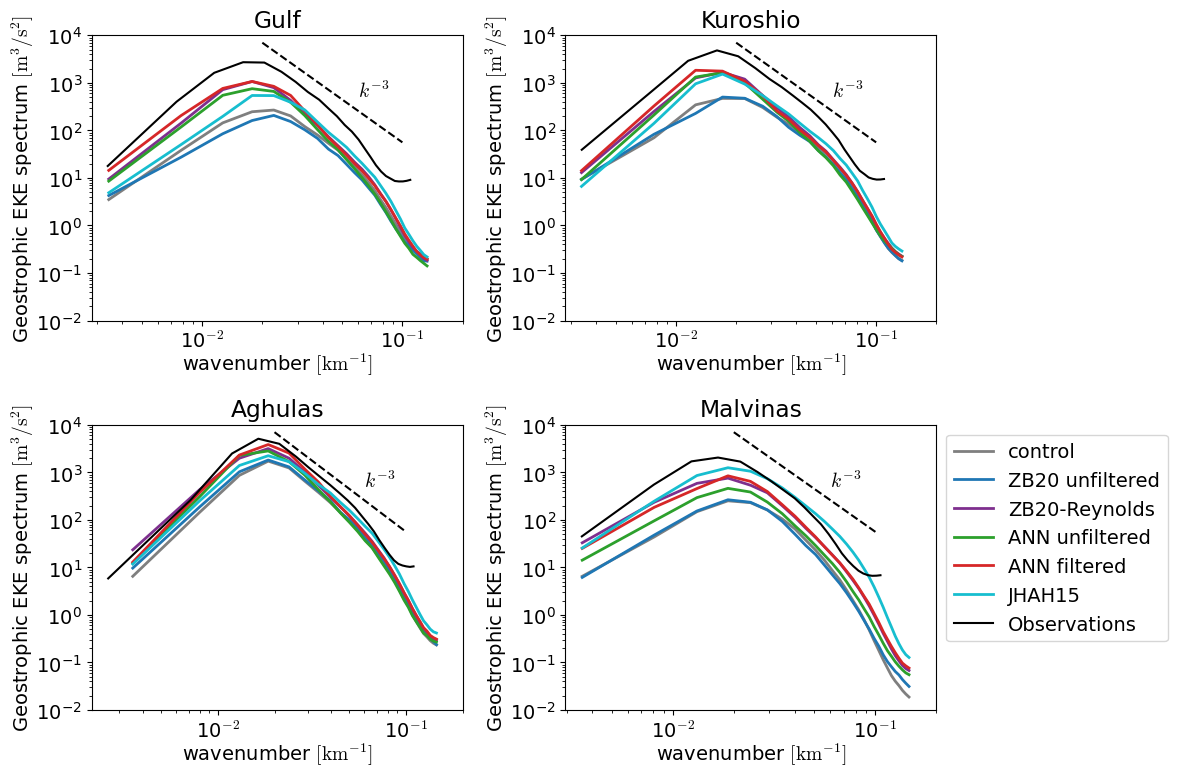

In [6]:
ds.plot_KE_spectrum(['unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline', 'JHAH15', 'obs'],
             labels=['control', 'ZB20 unfiltered', 'ZB20-Reynolds', 'ANN unfiltered', 'ANN filtered', 'JHAH15', 'Observations'],
             colors=['tab:gray', 'tab:blue', violet, 'tab:green', 'tab:red', 'tab:cyan', 'k'])
plt.savefig('EKE-spectrum.pdf')